In [1]:
# Importing liabraries and DataReader
import pandas as pd 
import pandas_datareader.data as web
import matplotlib.pyplot as plt 
import datetime
from datetime import date

In [2]:
# Setting time range
start = date(2016,1,1)
end = date.today()

In [3]:
# Getting data for a stock
stock_price = web.DataReader("TWTR", "google", start, end)
stock_price.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2017-06-05,18.29,18.34,18.02,18.23,10576479
2017-06-06,18.10,18.15,17.47,17.57,22811819
2017-06-07,17.62,17.74,17.30,17.44,15866228
2017-06-08,17.44,17.61,17.27,17.59,10550528
2017-06-09,17.65,17.66,16.45,16.90,21306172


In [4]:
stock_price["MA"] = stock_price["Close"].rolling(window=10).mean()

In [5]:
stock_price.head()

,Open,High,Low,Close,Volume,MA
Date,,,,,,
2016-01-04,22.64,22.84,22.11,22.56,15272743,NaN
2016-01-05,22.79,23.00,21.85,21.92,17077655,NaN
2016-01-06,21.62,22.18,21.18,21.39,14033627,NaN
2016-01-07,21.00,21.48,20.20,20.26,20759757,NaN
2016-01-08,20.51,20.72,19.60,19.98,21832259,NaN


In [6]:
stock_price=stock_price.dropna(how='any')

In [7]:
stock_price.head()

,Open,High,Low,Close,Volume,MA
Date,,,,,,
2016-01-15,18.23,18.53,17.61,17.94,24238369,20.100
2016-01-19,18.18,18.18,16.43,16.69,24016992,19.513
2016-01-20,16.16,19.04,15.48,17.38,69017691,19.059
2016-01-21,17.44,18.32,16.80,17.83,26310354,18.703
2016-01-22,18.29,18.56,17.73,17.84,15548544,18.461


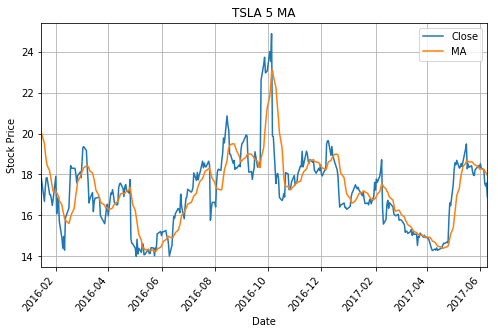

In [9]:
stock_price[['Close', 'MA']].plot(grid=True, figsize=(8,5))
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title("TSLA 5 MA")
plt.xticks(rotation=50)

plt.show()

In [10]:
# we create grids
price_fig = plt.subplot2grid((6,1),(0,0), rowspan=5, colspan=1)
volume_fig = plt.subplot2grid((6,1),(5,0), rowspan=1, colspan=1, sharex=price_fig)

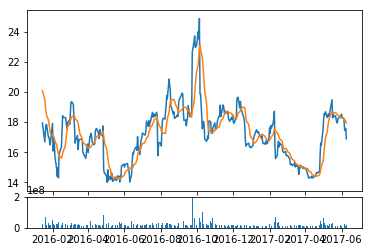

In [11]:
price_fig.plot(stock_price.index, stock_price['Close'])
price_fig.plot(stock_price.index, stock_price['MA'])
volume_fig.bar(stock_price.index, stock_price['Volume'])

plt.show()